#### Heavy Traffic Indicators on I-94

##### Aim

The project aims to analyze a dataset the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. 

##### Data

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

Attribute Information:

    - holiday: Categorical US National holidays plus regional holiday, Minnesota State Fair
    - temp: Numeric Average temp in kelvin
    - rain_1h: Numeric Amount in mm of rain that occurred in the hour
    - snow_1h: Numeric Amount in mm of snow that occurred in the hour
    - clouds_all: Numeric Percentage of cloud cover
    - weather_main: Categorical Short textual description of the current weather
    - weather_description: Categorical Longer textual description of the current weather
    - date_time: DateTime Hour of the data collected in local CST time
    - traffic_volume: Numeric Hourly I-94 ATR 301 reported westbound traffic volume

##### Exploring Dataset

We shall begin by exploring the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are 48204 entries and 9 columns. 

There is no null value in dataset.

Each row describes traffic and weather data for a specific hour — we have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.

In [4]:
i_94.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,48204,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204,48204,48204.000000
unique,12,NaN,NaN,NaN,NaN,11,38,40575,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,2013-05-19 10:00:00,NaN
freq,48143,NaN,NaN,NaN,NaN,15164,11665,6,NaN
mean,NaN,281.205870,0.334264,0.000222,49.362231,NaN,NaN,NaN,3259.818355
std,NaN,13.338232,44.789133,0.008168,39.015750,NaN,NaN,NaN,1986.860670
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1193.000000
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3380.000000
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000


##### Cleaning the 'temp' Column

The minimum value of temp is 0. 

Given that the unit for temperture is in Kelvin, this would mean that the temperture is -273.15 Celsius. The value is not realistic.

We shall further explore the 'temp' column and remove unrealistic values.

In [5]:
i_94['temp'].value_counts().sort_index(ascending= True).head(20)

0.00      10
243.39     1
243.62     1
244.22     1
244.82     3
244.89     1
245.62     1
245.70     3
246.04     1
246.15     2
246.26     1
246.36     1
246.38     1
246.39     3
246.47     3
246.52     2
246.60     1
246.64     1
246.65     1
246.68     1
Name: temp, dtype: int64

In [6]:
i_94 = i_94[i_94["temp"].between(1,400)]
i_94["temp"].describe()

count    48194.000000
mean       281.264219
std         12.709587
min        243.390000
25%        272.182500
50%        282.460000
75%        291.810000
max        310.070000
Name: temp, dtype: float64

##### Analyzing Traffic Volume

We shall start our analysis by examining the distribution of the traffic_volume column.

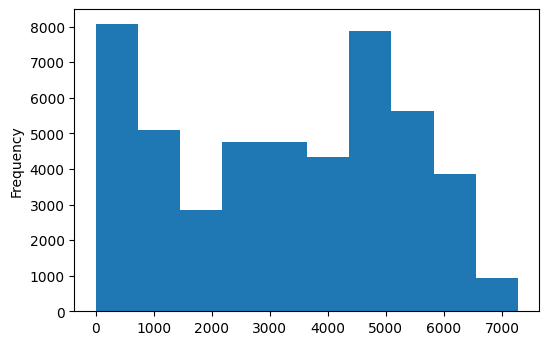

In [7]:
i_94['traffic_volume'].plot.hist()
plt.show()

In [8]:
i_94['traffic_volume'].describe()

count    48194.000000
mean      3260.221231
std       1986.760420
min          0.000000
25%       1194.000000
50%       3380.500000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,380 cars.

About 25% of the time, there were only 1,194 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

##### Traffic Volume: Day vs. Night

We shall start by dividing the dataset into two parts:
- Daytime data: hours from 7 AM to 7 PM (12 hours)
- Nighttime data: hours from 7 PM to 7 AM (12 hours) 

While this is not a perfect criterion for distinguishing between nighttime and daytime, it is a good starting point.

In [9]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]
print(night.shape)

(23875, 9)
(24319, 9)


There is a significant difference in row numbers between day and night is due to missing data. 

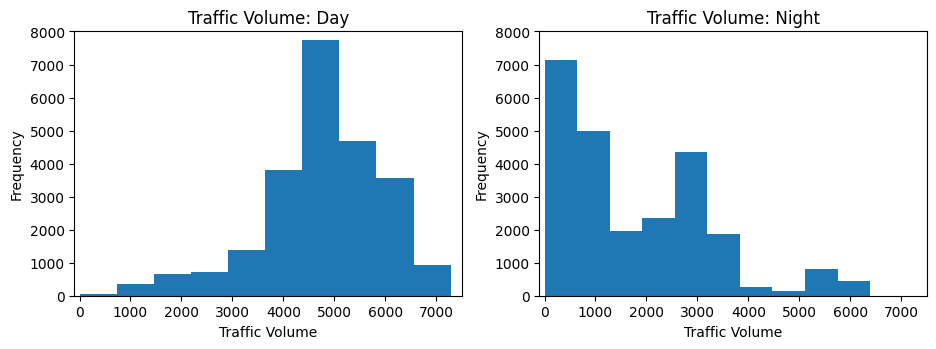

In [10]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [11]:
day['traffic_volume'].describe()

count    23875.000000
mean      4762.336126
std       1174.167620
min          0.000000
25%       4253.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
night['traffic_volume'].describe()

count    24319.000000
mean      1785.530943
std       1441.868127
min          0.000000
25%        530.500000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,253 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,253).

The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we will only focus on the daytime data moving forward.

##### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:
- Month
- Day of the week
- Time of day

In [13]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4715.096441
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

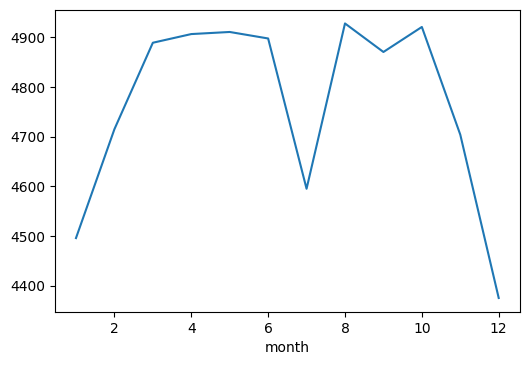

In [14]:
by_month['traffic_volume'].plot.line()
plt.show()

The traffic looks less heavy during cold months (Nov–Feb) and more intense during warm months (Mar–Oct), with one interesting exception: Jul. Is there anything special about July? Is traffic significantly less heavy in July each year?

To answer the last question, let's see how the traffic volume changed each year in July.

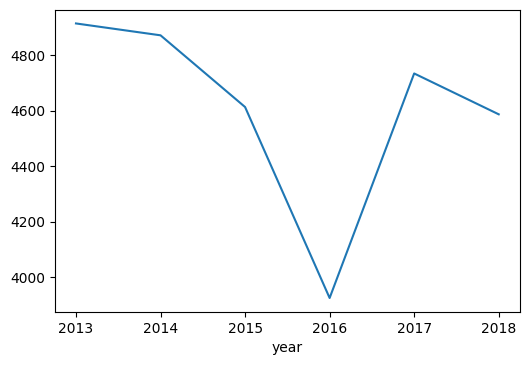

In [15]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Typically, the traffic is pretty heavy in July, similar to the other warm months. The only exception we see is 2016, which had a high decrease in traffic volume. One possible reason for this is road construction — [this article from 2016](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) supports this hypothesis.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars.

We shall now look at a more granular indicator: day number.

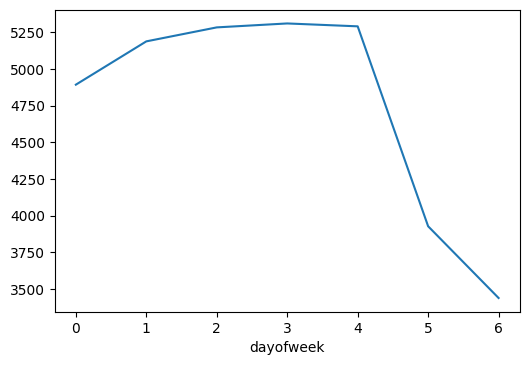

In [16]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.show()

Traffic volume is significantly heavier on business days (Mon – Fri). Except for Monday, we only see values over 5,000 during business days. Traffic is lighter on weekends, with values below 4,000 cars.

We shall now see what values we have based on time of the day. The weekends, however, will drag down the average values, so we are going to look only at the averages separately.

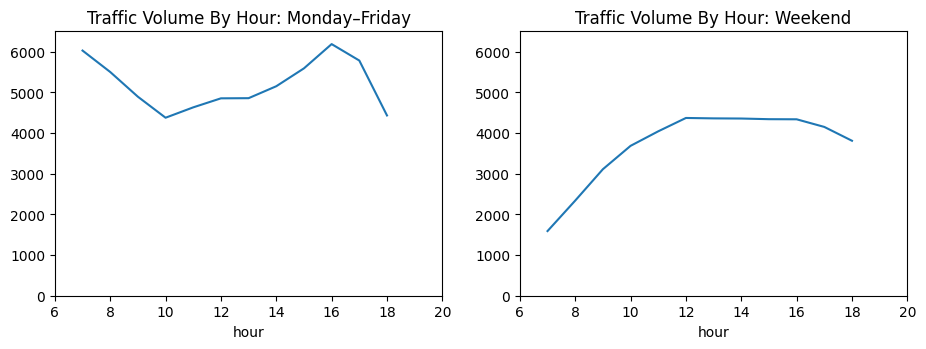

In [21]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 = Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(0,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to weekends.
- On business days, the rush hours are around 7 and 16.

##### Analyzing Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [22]:
day.corr()['traffic_volume']

temp              0.125536
rain_1h           0.003696
snow_1h           0.001259
clouds_all       -0.033295
traffic_volume    1.000000
month            -0.022673
year             -0.003754
dayofweek        -0.416275
hour              0.172429
Name: traffic_volume, dtype: float64

Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) do not show any strong correlation with traffic_volume.

We shall generate a scatter plot to visualize the correlation between temp and traffic_volume.

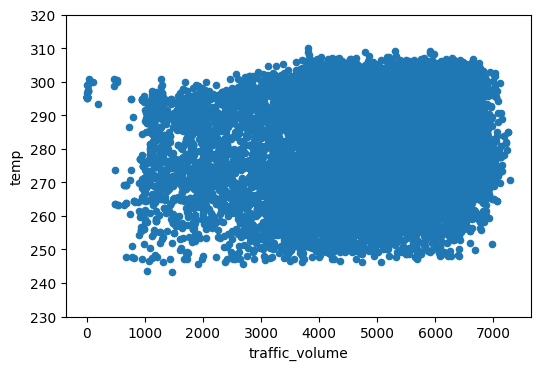

In [23]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: weather_main and weather_description.

To start, we are going to group the data by weather_main and look at the traffic_volume averages.

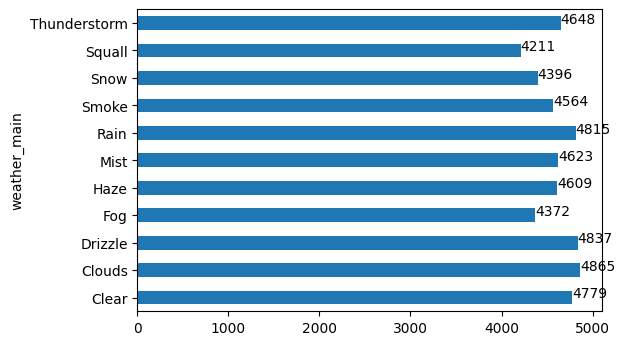

In [33]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
for index, value in enumerate(by_weather_main['traffic_volume']):
    plt.text(value, index,
             int(value))
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

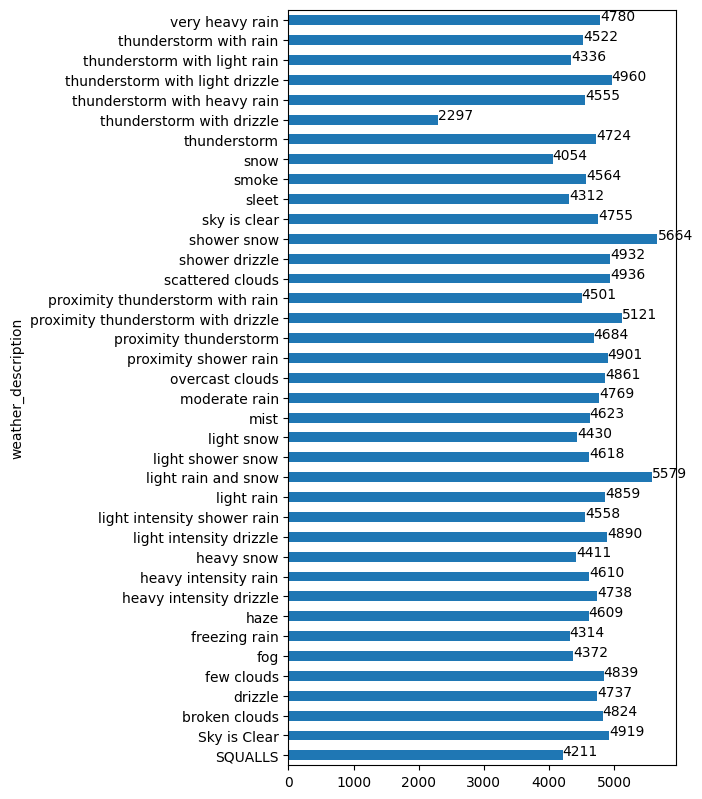

In [35]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
for index, value in enumerate(by_weather_description['traffic_volume']):
    plt.text(value, index,
             int(value))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

##### Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
-- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- - The traffic is usually heavier on business days compared to the weekends.
- - On business days, the rush hours are around 7 and 16.

- Weather indicators
- - Shower snow
- - Light rain and snow
- - Proximity thunderstorm with drizzle